In [1]:
# -*- coding: utf-8 -*-

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
%matplotlib inline

### Series
>Series可以认为是一个带有索引（有时也叫标签）的一位数组。

In [3]:
obj = pd.Series([4, 7, -5, 3])

In [4]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

通过Series对象的values和index属性获取它对应的数值和索引：

In [5]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [6]:
obj.index

RangeIndex(start=0, stop=4, step=1)

创建Series对象时通过index参数指定索引：

In [5]:
obj2 = pd.Series([7, 8, 9, 2], index=['a', 'b', 'c', 'd'])

In [6]:
obj2.values

array([7, 8, 9, 2], dtype=int64)

In [7]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

使用索引选择数据：

In [8]:
obj2['a']

7

In [9]:
obj2[['a', 'c', 'd']]

a    7
c    9
d    2
dtype: int64

和numpy类似，可以使用numpy的函数或者类numpy风格的操作去操纵Series对象。以下使用布尔表达式过滤数据：

In [10]:
#使用布尔数组过滤
obj2[obj2 > 7]

b    8
c    9
dtype: int64

In [11]:
#标量乘法
obj2 * 2

a    14
b    16
c    18
d     4
dtype: int64

In [12]:
#按元素（element-wise）应用函数
np.exp(obj2)

a    1096.633158
b    2980.957987
c    8103.083928
d       7.389056
dtype: float64

>Series还可以认为是一个固定长度的，已经排序过的字典，因为Series将索引映射到了数据。

In [13]:
'a' in obj2

True

In [14]:
'd' in obj2

True

In [15]:
'f' in obj2

False

可以通过一个字典去创建一个Series对象：

In [16]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [17]:
obj3 = pd.Series(sdata)

In [18]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

>当使用字典创建Series时，在较低版本的pandas中，字典的键会作为Series对象的索引，并且是排序过的，字典的值则作为Series的值。在创建Series对象时通过传入index参数可以保持所要的索引顺序：

In [19]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [20]:
obj4 = pd.Series(sdata, index=states)

In [21]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

因为数据sdata中没有California项，所以obj4中的California对应的数据为NaN（Not a Number），缺失项在pandas中通常被标记为NA或其它符号。同理，因为传入的索引states没有包含Utah，所以obj4也不会出现Utah这一项。  
pandas中的*isnull*和*notnull*函数用检测缺失值：

In [22]:
pd.isnull(obj4) # 检查哪些是缺失项

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [23]:
pd.notnull(obj4) # 检查哪些不是缺失项

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series对象也有上述的这两个方法：

In [24]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [26]:
obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

A useful Series features for many applications is that it automatically aligns by index label in arithmetic operations:

In [27]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [28]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [29]:
obj3 + obj4 #按照索引进行相加（对齐）

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series对象和其索引（index）都一个*name*属性：

In [30]:
obj3.name = 'population'

In [31]:
obj3.index.name = 'state'

In [32]:
obj3

state
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
Name: population, dtype: int64

Series对象的索引可以通过赋值就地（in-place）修改:

In [34]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [35]:
obj4.index = ['Bob', 'Steve','Jeff', 'Ryan']

In [36]:
obj4

Bob          NaN
Steve    35000.0
Jeff     16000.0
Ryan     71000.0
dtype: float64

### DataFrame  
A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, booelan, etc). The DataFrame has both a row and a column index; it can be thought of as a dict of Series all sharing the same  index.


>While DataFrame is physically two-dimensional, we can use it to represent higher dimensional data in a tabular format using hierarchical indexing (多级索引).

There are many ways to construct a DataFrame, though one of the most common is from a dict of equal-length list or numpy arrays:

In [37]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [38]:
df = pd.DataFrame(data)

In [39]:
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


如上所述，DataFrame和Series一样，也会自动添加索引。

对于比较大的DataFrame, 方法*head()*可以选择前面的几行进行查看：

In [43]:
# 默认是前5行，可以输入参数,如查看前10行：df.head(10)
df.head() 

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [44]:
df.head(10)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


在构造DataFrame时，可以传入参数colums用于指定列名,DataFrame将按照columns中的顺序显示各列的数据：

In [45]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


如果传入的列名不在字典中，那么该项将是缺失值：

In [66]:
df2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                  index=['one', 'two', 'three', 'four', 'five', 'six'])

In [47]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [48]:
df2.columns


Index(['year', 'state', 'pop', 'debt'], dtype='object')

DataFrame中的列可以像字典或者属性进行检索：

In [49]:
df2['state'] # 字典式检索

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [50]:
df2.state # 属性式检索

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

>注意：属性式检索在ipython交互环境中可以使用Tab进行自动补齐。 df2[column_name]对于任何列名都能正常工作，而df2.column_name只对那些符合Python命名规则的列名起作用!!! 


DataFrame中的行数据也可以通过特殊的属性*loc*按照位置或者名字进行检索：

In [53]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [52]:
df2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

列数据可以通过赋值进行修改，例如df2中的'debt'列为缺失项，可以赋予一个标量或数组：

In [55]:
df2['debt'] = 15.5 # 赋予标量

In [56]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,15.5
two,2001,Ohio,1.7,15.5
three,2002,Ohio,3.6,15.5
four,2001,Nevada,2.4,15.5
five,2002,Nevada,2.9,15.5
six,2003,Nevada,3.2,15.5


In [57]:
df2['debt'] = np.arange(6.) #赋予数组

In [58]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


需要注意的是，当赋予数组到列时，数组的长度必须该DataFrame对象中列的长度一致。  
如果赋予一个Series对象，那么Series对象的标签（索引）将会与DataFrame对象标签（索引）精确地对齐，缺失项插入缺失值。

In [59]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [70]:
df2['debt'] = val

In [73]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


给一个不存在的列名赋值将会创建新的列，和字典一样，可以使用*del*关键字删除列:

In [74]:
df2['eastern'] = df2.state == 'Ohio'

In [75]:
df2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


删除"eastern"列：

In [76]:
del df2['eastern']

In [77]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


>The column returned from indexing a DataFrame is a view on the underlying data, not a copy. Thus, any in-place modifications to the Series will be reflected in the DataFrame. The column can be explicitly copied with Series's *copy()* method.

In [78]:
d = df2['year']

In [80]:
d['one'] = 1998

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
d

one      1998
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [82]:
df2

,year,state,pop,debt
one,1998,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


从以上的操作可以看书，对Series对象d的修改反映到了df2中。

使用嵌套的字典创建DataFrame：

In [85]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [86]:
df3 = pd.DataFrame(pop)

In [87]:
df3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


从以上的例子可以看出，用嵌套的字典创建DataFrame时，字典的外部键作为DataFrame的列索引，而字典的内部键作为DataFrame的行索引。

和numpy一样，可以对一个DataFrame进行转置(行列交换)：

In [89]:
df3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


行索引和列索引也有自己的名字，可以设置：

In [92]:
df3.index.name = 'year' # 行索引的名字
df3.columns.name = 'state' # 列索引的名字

In [93]:
df3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


和Series一样，*values*属性以一个numpy.ndarray的形式返回包含在DataFrame中数据：

In [95]:
df3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

如果DataFrame中包含不同的数据类型：

In [96]:
df2.values

array([[1998, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

可作为构造DataFrame的数据：  
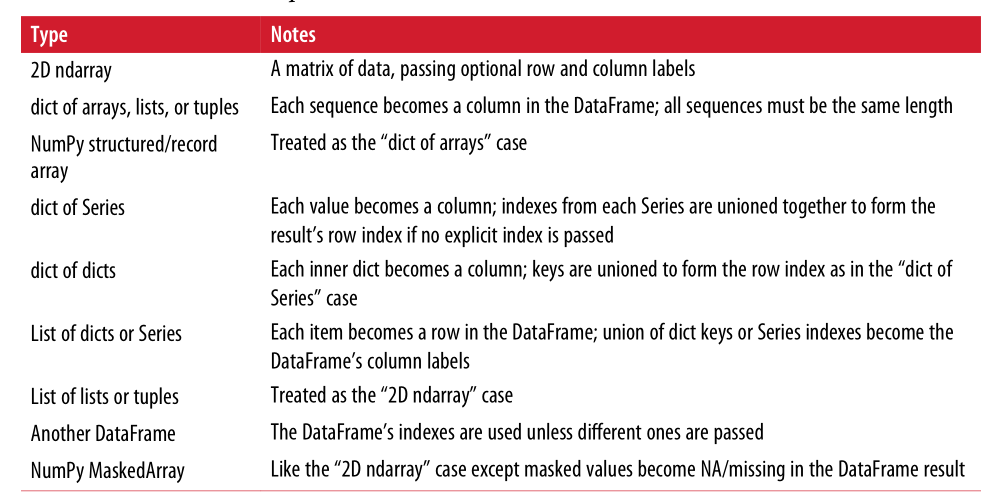

### 索引对象 

In [97]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [98]:
index = obj.index

In [99]:
index

Index(['a', 'b', 'c'], dtype='object')

In [100]:
index[1:]

Index(['b', 'c'], dtype='object')

注意：index对象是不可改变的，也就是用户不能修改它。

Immutability makes it safer to share Index objects among data structures:

In [101]:
labels = pd.Index(np.arange(3))

In [102]:
labels

Int64Index([0, 1, 2], dtype='int64')

In [103]:
obj2 = pd.Series([12.36, 2.5, 3.6], index=labels)

In [104]:
obj2

0    12.36
1     2.50
2     3.60
dtype: float64

In [105]:
obj2.index is labels

True

Index对象除了表现得数组以外，它 还表现得像固定大小的集合：

In [107]:
df3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [108]:
df3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [109]:
'Ohio' in df3.columns

True

In [110]:
2003 in df.index

False

>不过需要注意的是：Index对象不像Python的集合（set）那样，它允许有重复值：

In [111]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

In [112]:
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

>通过重复的索引将会选取到所有这些索引对应的数据。

Index对象常见的方法或者属性有:  
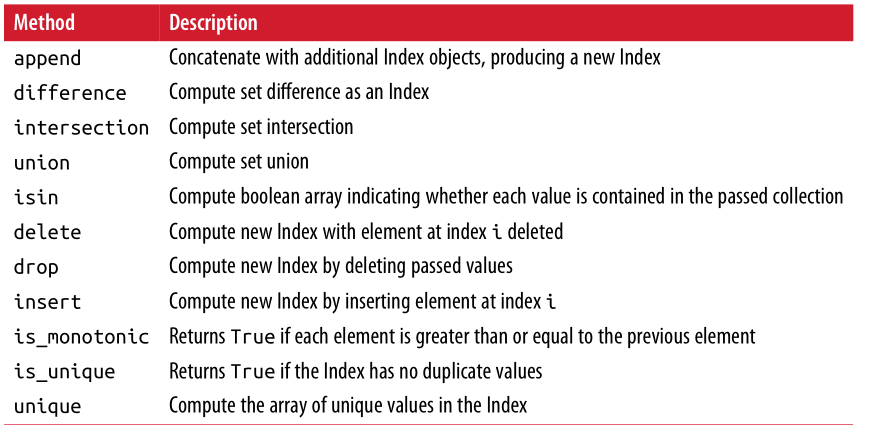

### 重要的函数 

#### 重索引
An important method on pandas object is *reindex*, which means to create a new object with the data *conformed* to a new index. Consider an example: 

In [113]:
obj = pd.Series([4.5, 7.2, -5.3, 9.6], index=['d', 'b', 'a', 'c'])

In [114]:
obj

d    4.5
b    7.2
a   -5.3
c    9.6
dtype: float64

Calling *reindex()* method on this Series rearanges the data according to the new index, introducing missing values if any index values are not already present:

In [115]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [116]:
obj2

a   -5.3
b    7.2
c    9.6
d    4.5
e    NaN
dtype: float64

For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing. The method option allows us to do this, using method such as 'ffill', which forward-fills the values:

In [117]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [118]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [119]:
#'ffile'表示使用缺失值前面一项的数据填充它
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

对于DataFrame，*reindex*方法可以修改行和列索引。当只给*reindex()*方法传入一个序列时，将对行索引进行修改：

In [120]:
frame = pd.DataFrame(np.arange(9).reshape((3,3)),
                    index=['a', 'c', 'd'],
                    columns=['Ohio', 'Texas', 'California'])

In [121]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [122]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [123]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


对列索引进行reindex：

In [124]:
states = ['Texas', 'Utah', 'California']

In [125]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


*reindex()*常见的参数如下：
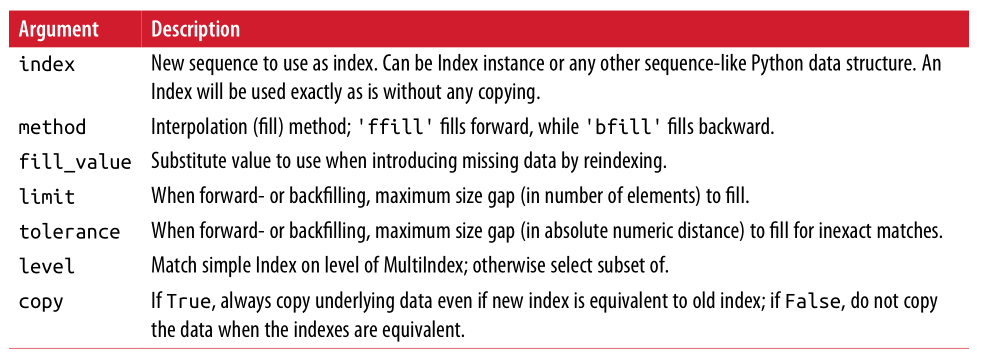

结合*loc*属性，可以较为简洁地进行reindex,可以用此方式排出一些数据：

In [126]:
frame.loc[['a', 'b', 'c', 'd'], states]

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


>从上述的执行结果可知，不推荐这样使用*loc*属性，在将来的版本中使用将会跑出KeyError的异常，采用*reindex()*方法替代。

###  从轴中删除数据
#### Dropping Entries from An Axis

使用*drop*方法可以删除指定轴的数据，该方法将返回一个不包含所删除的数据的新对象：

In [127]:
obj = pd.Series(np.arange(5.), index=list('abcde'))

In [128]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [129]:
new_obj = obj.drop('c')

In [130]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [131]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

对于DataFrame，可以从任意一个轴中删除数据：

In [134]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                   index=['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns=['one', 'two', 'three', 'four'])

In [135]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Calling *drop()* with a sequence of labels will drop from the row lables (axis 0):

In [137]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


We can drop values from the columns by passing axis=1 or axis='columns':

In [138]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [140]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


Many functions, like *drop()*, which modifies the size or shape of a Series or DataFrame, can manipulate an object *in-place* without returning a new object:

In [141]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [142]:
obj.drop('d', inplace=True)

In [143]:
obj

a    0.0
b    1.0
c    2.0
e    4.0
dtype: float64

>Be careful with *drop*, as it destroys any data that is droped.

### 索引，选取和滤波
#### Indexing, Selection, and Filtering

In [144]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [145]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [146]:
obj['c']

2.0

In [147]:
obj[2]

2.0

In [148]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [149]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [150]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [151]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

#### 切片  
Slicing with labels behaves differently than normal Python slicing in that the endpoint is inclusive:

In [152]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [153]:
obj['b':'c'] = 8

In [154]:
obj

a    0.0
b    8.0
c    8.0
d    3.0
dtype: float64

对DataFrame进行索引，通过传入单个值或者序列索引检索出一个或者多个列的数据：

In [155]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                   index=['Shanghai', 'Guangzhou', 'Nanning', 'Qingdao'],
                   columns=['Mon', 'Tue', 'Wen', 'Thir'])

In [156]:
data

,Mon,Tue,Wen,Thir
Shanghai,0,1,2,3
Guangzhou,4,5,6,7
Nanning,8,9,10,11
Qingdao,12,13,14,15


In [157]:
data['Mon']

Shanghai      0
Guangzhou     4
Nanning       8
Qingdao      12
Name: Mon, dtype: int32

In [162]:
data[['Mon', 'Thir']]

,Mon,Thir
Shanghai,0,3
Guangzhou,4,7
Nanning,8,11
Qingdao,12,15


In [163]:
data[:2] # 注意这个是按照行进行选择

,Mon,Tue,Wen,Thir
Shanghai,0,1,2,3
Guangzhou,4,5,6,7


In [168]:
data[data['Thir'] > 5]

,Mon,Tue,Wen,Thir
Guangzhou,4,5,6,7
Nanning,8,9,10,11
Qingdao,12,13,14,15


>注意，在DataFrame中，传入单个值或序列时，[]操作符选择的是列数据。

还有一种情况是布尔索引：

In [169]:
data < 5

,Mon,Tue,Wen,Thir
Shanghai,True,True,True,True
Guangzhou,True,False,False,False
Nanning,False,False,False,False
Qingdao,False,False,False,False


In [170]:
data[data < 5] = 0

In [171]:
data

,Mon,Tue,Wen,Thir
Shanghai,0,0,0,0
Guangzhou,0,5,6,7
Nanning,8,9,10,11
Qingdao,12,13,14,15


### 通过loc和iloc属性对DataFrame的数据进行行列选择 

In [172]:
data

,Mon,Tue,Wen,Thir
Shanghai,0,0,0,0
Guangzhou,0,5,6,7
Nanning,8,9,10,11
Qingdao,12,13,14,15


In [174]:
# Let's select a single row and multiple columns by lables
# loc接受的是显式索引
data.loc['Guangzhou', ['Mon', 'Tue', 'Thir']]

Mon     0
Tue     5
Thir    7
Name: Guangzhou, dtype: int32

In [175]:
#选择第1行的数据
data.iloc[1] # iloc接受的是隐式索引

Mon     0
Tue     5
Wen     6
Thir    7
Name: Guangzhou, dtype: int32

In [177]:
# 选择第1行，第2行，第3列，第0列和第1列的数据
data.iloc[[1, 2], [3, 0, 1]]

,Thir,Mon,Tue
Guangzhou,7,0,5
Nanning,11,8,9


#### DataFrame切片

In [178]:
data.loc[:'Nanning', 'Thir']

Shanghai      0
Guangzhou     7
Nanning      11
Name: Thir, dtype: int32

In [181]:
# 前三列中，选择第三列的值大于6的数据
data.iloc[:, :3][data.Wen > 6]

,Mon,Tue,Wen
Nanning,8,9,10
Qingdao,12,13,14


In [180]:
data

,Mon,Tue,Wen,Thir
Shanghai,0,0,0,0
Guangzhou,0,5,6,7
Nanning,8,9,10,11
Qingdao,12,13,14,15


##### DataFrame常见的索引方式：   
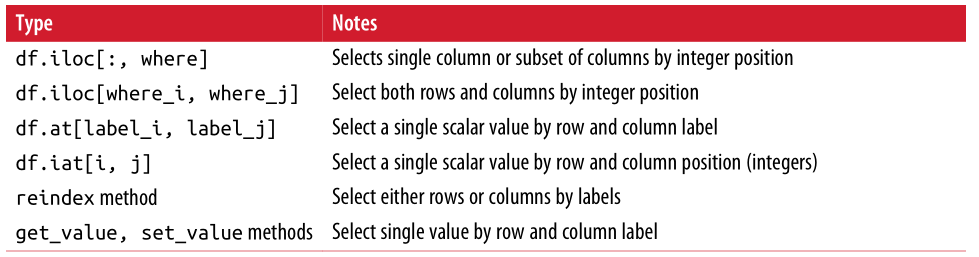  
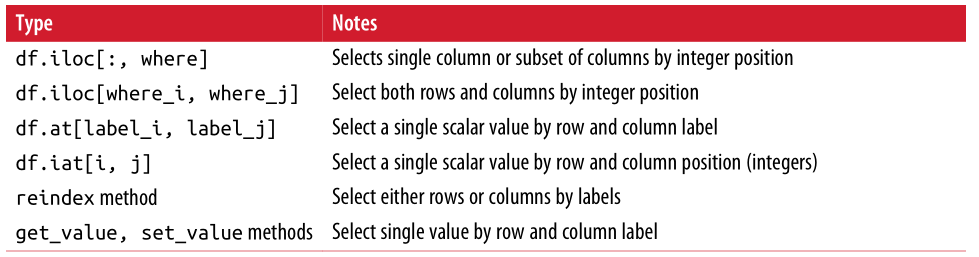

### 整数索引
#### Integer Indexes

Working with pandas objects indexed by integers is something that often trips up new users due to some differences with indexing semantics on built-in data structures like lists and tuples. For example, you might not expect the following code to generate an error:

In [185]:
ser = pd.Series(np.arange(3.))

In [186]:
ser[-1] # 这个语法会跑出异常

KeyError: -1

In [187]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [188]:
ser[2]

2.0

In [189]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

下面这个语法是正确的，原因是其索引是标签索引（这里是:a, b, c），与隐式的索引（0,1,2,3,..., N-1）不会发生歧义：

In [190]:
ser2[-1] 

2.0

In [191]:
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

>从上述的ser和ser2的例子中可以看出，如果标签索引是包含整数的，那么标签索引会覆盖隐式索引的功能。因此为了更精确地处理，建议使用属性*loc* (针对于标签索引)和*iloc* (针对隐式索引)：

In [192]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [193]:
ser[:1]

0    0.0
dtype: float64

In [194]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [195]:
ser.iloc[-1]

2.0

In [197]:
ser.iloc[:1] # 与ser[:1]的结果相同

0    0.0
dtype: float64

### 算术与数据对齐
#### Arithmetic and Data Alignment

对于一些应用来说，pandas的一个重要的特征是不同索引的两个对象进行算术运算表现出来的行为。当将两个对象相加时，如果任意两个索引是不同的，那么相加的结果将是这两个索引的并，这类似数据库中在索引上的外连接：

In [198]:
s1 = pd.Series([7.3, 6.5, 3.5, 1.4], index=['a', 'c', 'd', 'e'])

In [199]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [200]:
s1

a    7.3
c    6.5
d    3.5
e    1.4
dtype: float64

In [201]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

将s1和s2相加：

In [202]:
s1 + s2

a     5.2
c    10.1
d     NaN
e    -0.1
f     NaN
g     NaN
dtype: float64

In [203]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
    index=['Ohio', 'Texas', 'Colorado'])

In [204]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
 index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [205]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [206]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [208]:
# b和d列及Ohio和Texas行的位置会正常相加
# 其它位置都是NaN
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


如果将行和列都没有相同的标签的DataFrame对象相加，那么所得的结果全是null：

### 带有填充值得算术运算
#### Arithmetic methods with fill values

In [209]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))

In [210]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                  columns=list('abcde'))

In [212]:
df2.loc[1, 'b'] = np.nan

In [213]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [214]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [215]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


使用DataFrame对象自带的*add*()方法：

In [216]:
df1.add(df2, fill_value=0) # 用0替代NaN值加入运算

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Flexible arithmetic methods:
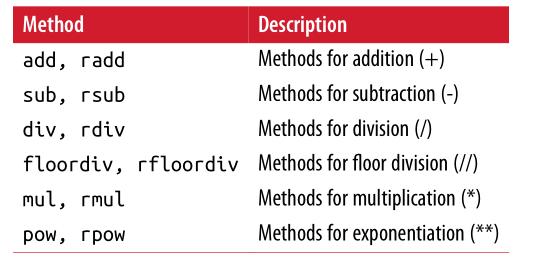

In [219]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [217]:
1 / df1 #等价于df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [221]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [218]:
df1.div(2) #等价于df1 / 2

,a,b,c,d
0,0.0,0.5,1.0,1.5
1,2.0,2.5,3.0,3.5
2,4.0,4.5,5.0,5.5


In [220]:
df1 / 2

,a,b,c,d
0,0.0,0.5,1.0,1.5
1,2.0,2.5,3.0,3.5
2,4.0,4.5,5.0,5.5


当然，在Series对象和DataFrame对象使用*reindex*()方法时，也可以传入*fill_value*参数：

In [222]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### 在DataFrame和Series之间的操作
#### Operations between Series and DataFrame

首先来看一下一个二维数组和一个一维向量之间的操作：

In [223]:
arr = np.arange(12.).reshape((3, 4))

In [224]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [225]:
arr[0]

array([0., 1., 2., 3.])

In [226]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

When we subtract **arr[0]** from arr, the subtraction is performed once for each row. This is referred to as ***broadcasting***. Operations between Series and DataFrame are similar:

In [227]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                    columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [228]:
series = frame.iloc[0]

In [229]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [230]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

By default, arithmetic between Series and DataFrame matches the index of the Series on the DataFrame's columns, broadcasting down the rows:

In [231]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


If an index value is not found in either the DataFrame's columns or the Series's index, the objects will be reindexed to form the union:

In [234]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [235]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


If we want to broadcast over the columns, matching on the rows, we have to ues one of the arithmetic, for example:

In [236]:
series3 = frame['d']

In [237]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [238]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [239]:
frame - series3 # 默认是在列上进行广播

,Ohio,Oregon,Texas,Utah,b,d,e
Utah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ohio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Texas,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oregon,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
#在行上广播要使用arithmetic methods
# axis参数可选'index'(0)和'columns'(1)
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### 函数应用和映射
#### FunctionApplication and Mapping

Numpy ufuncs (element-wise array methods) also work with pandas objects:

In [246]:
df = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [247]:
df

,b,d,e
Utah,1.632727,-0.484744,0.032315
Ohio,-0.738872,-1.407839,-0.928412
Texas,-0.293890,-2.077109,0.551096
Oregon,0.294863,-1.506622,0.121676


In [248]:
np.abs(df)

,b,d,e
Utah,1.632727,0.484744,0.032315
Ohio,0.738872,1.407839,0.928412
Texas,0.293890,2.077109,0.551096
Oregon,0.294863,1.506622,0.121676


In [249]:
np.exp(df)

,b,d,e
Utah,5.117811,0.615855,1.032843
Ohio,0.477652,0.244671,0.395181
Texas,0.745358,0.125292,1.735154
Oregon,1.342943,0.221657,1.129389


Another frequent operation is applying a function on one-dimensional array to each row or column. DataFrame's *apply*() method does exactly this:

In [250]:
f = lambda x: x.max() - x.min()

In [254]:
df.apply(f) # 默认是axis=0，即对行应用函数f, axis=0等价于axis='index'

b    2.371599
d    1.592366
e    1.479509
dtype: float64

In [255]:
df.apply(f, axis=1) # axis=1等价于axis='columns'

Utah      2.117470
Ohio      0.668967
Texas     2.628206
Oregon    1.801485
dtype: float64

In [256]:
df

,b,d,e
Utah,1.632727,-0.484744,0.032315
Ohio,-0.738872,-1.407839,-0.928412
Texas,-0.293890,-2.077109,0.551096
Oregon,0.294863,-1.506622,0.121676


The function passed to *apply*() method need not return a scalar value; it can also return a Series with multiple values:

In [257]:
def f(x):
    return pd.Series([x.max(), x.min()], index=['max', 'min'])

In [258]:
df.apply(f)

,b,d,e
max,1.632727,-0.484744,0.551096
min,-0.738872,-2.077109,-0.928412


Element-wise Python function can be used, too. Suppose we want to compute a formatted string from each float-point value in **df**, we can do this with *applymap*():

In [259]:
formatt = lambda x: '%.2f' % x

In [260]:
df.applymap(formatt)

,b,d,e
Utah,1.63,-0.48,0.03
Ohio,-0.74,-1.41,-0.93
Texas,-0.29,-2.08,0.55
Oregon,0.29,-1.51,0.12


The reason for the name *applymap* is that Series has a *map*() method for applying an element-wise function: 

In [261]:
df['e'].map(formatt)

Utah       0.03
Ohio      -0.93
Texas      0.55
Oregon     0.12
Name: e, dtype: object

### 排序和排列
#### Sorting and Ranking


Sorting a dataset by some criterion (标准，规范，准则) is another important built-in oepration. To sort lexicograpically by row or column index, use the *sort_index*() method, which returns a new, sorted object: 

#### Sorting

In [262]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [263]:
obj

d    0
a    1
b    2
c    3
dtype: int64

In [265]:
#按照索引进行排序
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

With a DataFrame, we can sort by index on either axis:

In [267]:
frame = pd.DataFrame(np.arange(8.).reshape((2, 4)),
                    index=['three', 'one'],
                    columns=['d', 'a', 'b', 'c'])

In [268]:
frame

,d,a,b,c
three,0.0,1.0,2.0,3.0
one,4.0,5.0,6.0,7.0


In [269]:
frame.sort_index() # 默认axis=0,按照行索引去排序

,d,a,b,c
one,4.0,5.0,6.0,7.0
three,0.0,1.0,2.0,3.0


In [270]:
frame.sort_index(axis=1) #axis=1等价axis='columns'，按照列排序

,a,b,c,d
three,1.0,2.0,3.0,0.0
one,5.0,6.0,7.0,4.0


The data is sorted in ascending by default, but can be sorted in descending order, too:

In [271]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0.0,3.0,2.0,1.0
one,4.0,7.0,6.0,5.0


To sort a Series by its values, use its *sort_values*() method:

In [273]:
obj = pd.Series([4, 7, -3, 2])

In [274]:
obj.sort_values() # 按照值排序

2   -3
3    2
0    4
1    7
dtype: int64

Any missing values are sorted to the end of the Series by default:

In [275]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

In [276]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

When sorting a DataFrame, we can use the data in one or more columns as the sort keys. To do so, pass one or more column names to th *by* options of *sort_values*():

In [277]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [278]:
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [279]:
frame.sort_values(by=['b', 'a'])

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [282]:
frame.sort_values(by='a')

,b,a
0,4,0
2,-3,0
1,7,1
3,2,1


In [281]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


#### Ranking
数据排名，类似于成绩排名

In [283]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])


In [287]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [288]:
# 7是最大值，所以是第一名，-5是小值，所以是最后一名，即
# 第五名，索引2处的值也是7，所以也是第一名，同理4是第二名，0
# 是第三名。
obj.rank(method='dense', ascending=False)

0    1.0
1    5.0
2    1.0
3    2.0
4    3.0
5    4.0
6    2.0
dtype: float64

### 具有重复标签值的索引的轴
Axis Indexes with Duplicate Lables

While many pandas funcitons (like *reindex*()) require that the labels be unique, it's not mandatory. Let's consider a small Series with duplicate indices:

In [289]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [290]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

index对象的*is_unique*属性可以判断一个index对象是否包含不重复的值：

In [291]:
obj.index.is_unique

False

In [292]:
obj['a']

a    0
a    1
dtype: int64

In [293]:
obj['c']

4

In [294]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

In [295]:
df

,0,1,2
a,-1.004480,1.217362,-1.131621
a,-0.341390,-1.181217,-1.028187
b,0.535044,0.457882,-2.260580
b,-1.500144,0.790653,1.456395


In [297]:
df.loc['a']

,0,1,2
a,-1.00448,1.217362,-1.131621
a,-0.34139,-1.181217,-1.028187


In [298]:
df.loc['b']

,0,1,2
b,0.535044,0.457882,-2.260580
b,-1.500144,0.790653,1.456395


### 总结和计算描述性统计
Summarizing and Computing Descriptive Statistics

pandas对象附带了一系列的数学和统计方法（函数），这些方法大部分是从一个Series对象或者DataFrame对象中一系列的来自行或者列的值提取一个单一的值的统计规约方法，比如*sum*()和*mean*()方法。相比于numpy中应用于数组的相似的方法，pandas自带的这些方法可以处理缺失值。Consider a small DataFrame:

In [299]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
     [np.nan, np.nan], [0.75, -1.3]],
     index=['a', 'b', 'c', 'd'],
     columns=['one', 'two'])

In [300]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [301]:
1.4+7.1+0.75

9.25

In [302]:
df.sum() # 自动忽略缺失值，默认按行求和

one    9.25
two   -5.80
dtype: float64

In [303]:
df.sum(axis='columns') # 按列求和

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA values are excluded unless the entire slice is NA. This can be disabled with the option *skipna*:

In [306]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [305]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

The table below is a list of common options for each reduction method:  
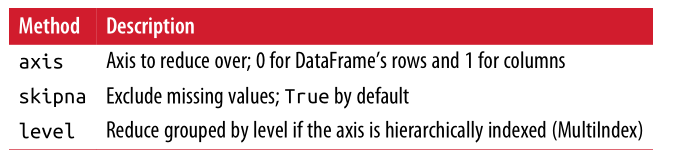

Some methods, like *idxmax*() and *idxmin*(), return indirect statistics like the index value where the maximum or minimum values are attained:

In [307]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [308]:
# 在第one列中，最大值在索引b处
# 在第two列中，最大值在索引d处
df.idxmax()

one    b
two    d
dtype: object

In [312]:
df.idxmin(axis=1)

a    one
b    two
c    NaN
d    two
dtype: object

**Other methods are accumulations:**

In [316]:
df.cumsum() # 累积和 默认是axis=0,按列求累积和，遇到缺失值跳过

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [314]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


**Another type of method is neither reuduction nor accumulation *describe*() method is one such example, producing multiple summary statistics in one shot:**. 

In [317]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [318]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


**On non-numeric data, *descibe*() method produces alternative summary statistics:**

In [319]:
obj = pd.Series(['a', 'b', 'b', 'c'] * 4)

In [320]:
obj.describe()

count     16
unique     3
top        b
freq       8
dtype: object

解释：在obj中：  
count：总有16个元素  
unique：不重复的元素共有3个，即a,b,c  
top:数量最多的元素是b  
freq：数组最多的元素出现的次数是8次

See the table below for a full list of summary statistics and related methods:  
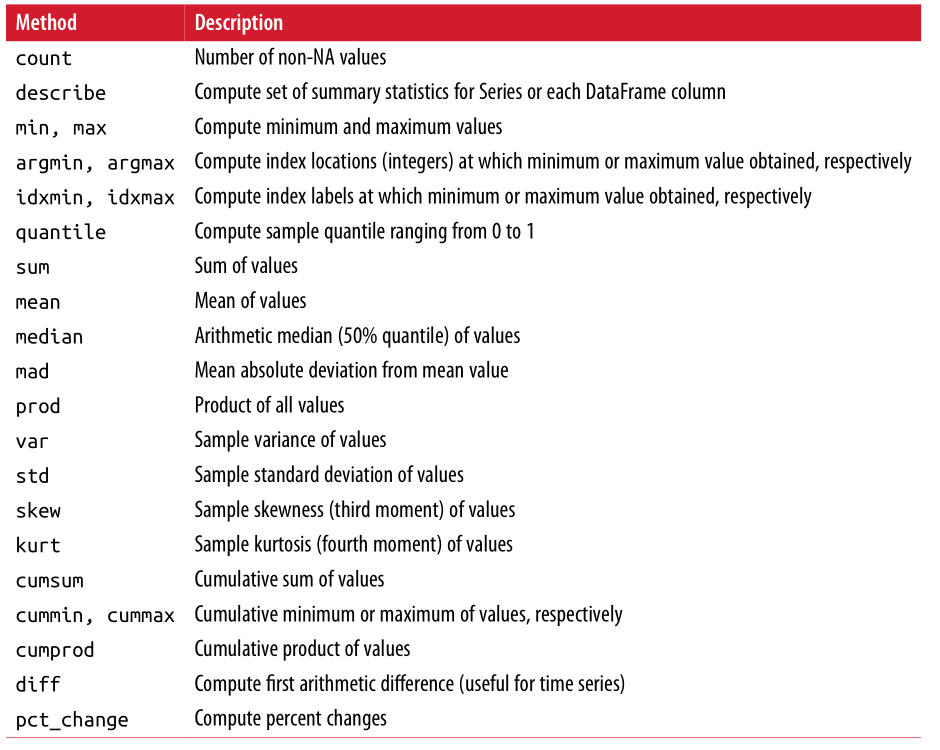

>说明：  
（1）*quantile*()方法用来计算分位数；  
（2）*median*()方法用来计算中位数，也就是50%的分位数；  
（3）*cumsum*()和*cumpro*()分别是累积和与累积乘；  


In [324]:
df = pd.DataFrame(np.random.normal(size=(5,5)),
                 columns=['Mon', 'Tue', 'Wen', 'Thir', 'Fri'],
                 index=['9:00', '10:00', '11:00', '12:00', '13:00'])

In [325]:
df

,Mon,Tue,Wen,Thir,Fri
9:00,0.947468,1.810931,1.187344,0.598228,-0.538808
10:00,-0.555375,0.657788,0.544159,1.192447,-0.000992
11:00,0.186956,-0.449041,-0.602747,-0.423987,2.501023
12:00,0.577842,0.728901,1.405785,0.134646,0.445559
13:00,-0.918590,1.153530,0.336928,-1.085539,0.312552


In [326]:
df.kurt()

Mon    -1.999577
Tue     1.207516
Wen     0.069916
Thir   -0.782590
Fri     3.222826
dtype: float64

In [327]:
df.mad()

Mon     0.627714
Tue     0.561447
Wen     0.577817
Thir    0.670338
Fri     0.782863
dtype: float64

### 相关性和方差
Correlation and Covariance

Some summary statistics, like correlation and covariance, are computed from pairs of arguments. Let's consider DataFrames of stock prices and volumes obtained from Yahoo! Finance using the add-on **pandas-datareader**. It can be installed via *conda* or *pip*:  
*conda install pandas-datareader*

In [328]:
import pandas_datareader.data as web

In [329]:
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [330]:
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items()})

In [332]:
volume = pd.DataFrame({ticker: data['Volume'] 
                      for ticker, data in all_data.items()})

In [335]:
returns = price.pct_change()

In [336]:
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2019-06-25,-0.015158,-0.007104,-0.031572,-0.026149
2019-06-26,0.021629,0.001156,0.003747,-0.006029
2019-06-27,-0.000300,0.000000,0.001643,-0.003510
2019-06-28,-0.009112,-0.004476,-0.001416,0.004554
2019-07-01,0.018341,0.014358,0.012840,0.015764


In [337]:
# corr()用于计算相关性
returns['MSFT'].corr(returns['IBM'])

0.48726090952041257

In [339]:
returns.MSFT.corr(returns.IBM)

0.48726090952041257

In [338]:
# var()用于计算方差
returns['MSFT'].cov(returns['IBM'])

8.673862847710362e-05

In [341]:
returns.MSFT.cov(returns.IBM)

8.673862847710362e-05

In [342]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.379663,0.453240,0.460733
IBM,0.379663,1.000000,0.487261,0.403240
MSFT,0.453240,0.487261,1.000000,0.538032
GOOG,0.460733,0.403240,0.538032,1.000000


In [344]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000266,0.000076,0.000107,0.000116
IBM,0.000076,0.000151,0.000087,0.000077
MSFT,0.000107,0.000087,0.000209,0.000120
GOOG,0.000116,0.000077,0.000120,0.000239


In [345]:
# 和IBM列计算相关性
returns.corrwith(returns.IBM)

AAPL    0.379663
IBM     1.000000
MSFT    0.487261
GOOG    0.403240
dtype: float64

Passing a DataFame computes the correlations of matching column names. Here we compute correlations of percent changes with *volume*:

In [346]:
returns.corrwith(volume)

AAPL   -0.062502
IBM    -0.156144
MSFT   -0.090308
GOOG   -0.020603
dtype: float64

>Passing axis='columns' does things row-by-row instead. In all cases, the data points are aligned by label before the correlation is computed.

### Unique Values, Values Counts, and Menbership

Another class of related methods extracts information about the values contained in a one-dimensional Series. To illustrate this, consider this example:

In [347]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [348]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

The first function is *unique*(), which give us an array of the unique values in a Series:

In [349]:
uniques = obj.unique()

In [350]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

Relatedly, *value_counts*() computes a Series containing value frequencies:

In [351]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

*value_counts*() is also available as a top-level pandas method that can be used with any array or sequence:

In [355]:
pd.value_counts(obj.values, sort=False)

a    3
c    3
b    2
d    1
dtype: int64

In [354]:
pd.value_counts(obj.values, sort=True)

c    3
a    3
b    2
d    1
dtype: int64

*isin*() performs a vectorized set membership check and can be useful in filtering a dataset down to a subset of values in a Series or column in a DataFrame:

In [356]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [357]:
mask = obj.isin(['c', 'b'])

In [358]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [359]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

和*isin*()方法类似的还有*Index.get_indexer*(), 该方法可以在一个数组中寻找另外一个数组中的元素在该数组中出现的索引：

In [360]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

In [361]:
unique_vals = pd.Series(['c', 'b', 'a'])

In [362]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

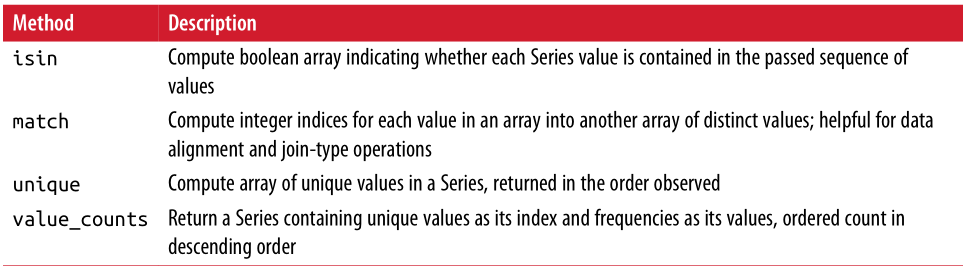

In some cases, we may want to compute a histogram on multiple related columns in a DataFrame. Here's an example:

In [366]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
        'Qu2': [2, 3, 1, 2, 3],
        'Qu3': [1, 5, 2, 4, 4]})

In [367]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


现在我们要计算这些数据中的每一个元素在每一列中出现的次数：

In [368]:
result = data.apply(pd.value_counts).fillna(0)

In [369]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


本章完结。